In [127]:
import os
import pandas as pd

In [151]:
cwd = os.getcwd()
notebook_path = os.path.abspath('__file__')
root_dir = os.path.dirname(notebook_path)
file_path = os.path.join(root_dir, 'CSVs', 'RNN_errors_analysis.csv')
RNN_errors = pd.read_csv(file_path)

In [133]:
import pandas as pd

# assume you already have a DataFrame named RNN_errors
# with columns "label", "correct_pred", and "pred"

# define a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(RNN_errors[RNN_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count")

# rename the index using the label lookup dictionary
false_counts.rename(index=label_lookup, inplace=True)

# sort the table by the highest count of False values
false_counts_sorted = false_counts.sum(axis=1).sort_values(ascending=False)

# print the sorted table
print(false_counts_sorted)


label
Company                   157.0
Building                   91.0
Artist                     72.0
WrittenWork                72.0
EducationalInstitution     71.0
Film                       61.0
MeanOfTransportation       51.0
OfficeHolder               45.0
Album                      44.0
Animal                     41.0
NaturalPlace               25.0
Athlete                    21.0
Plant                      14.0
Village                     8.0
dtype: float64


In [134]:
import pandas as pd

# assume you already have a DataFrame named RNN_errors
# with columns "label", "correct_pred", and "pred"

# define a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(RNN_errors[RNN_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count")

# rename the columns and index labels
false_counts.rename(columns={"count": "Count of false predictions"}, index=label_lookup, inplace=True)
false_counts.index.name = "True Category"

# sort the table by the highest count of False values
false_counts_sorted = false_counts.sum(axis=1).sort_values(ascending=False)

# print the sorted table
(false_counts_sorted)


True Category
Company                   157.0
Building                   91.0
Artist                     72.0
WrittenWork                72.0
EducationalInstitution     71.0
Film                       61.0
MeanOfTransportation       51.0
OfficeHolder               45.0
Album                      44.0
Animal                     41.0
NaturalPlace               25.0
Athlete                    21.0
Plant                      14.0
Village                     8.0
dtype: float64

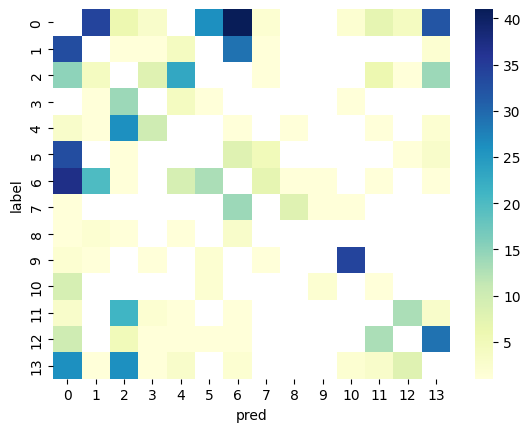

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assume you already have a DataFrame named RNN_errors
# with columns "label", "correct_pred", and "pred"

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(RNN_errors[RNN_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count")

# create a heatmap of the false_counts table using seaborn
sns.heatmap(false_counts, cmap="YlGnBu")

# show the plot
plt.show()


Shall we also have a confusion matrix? 

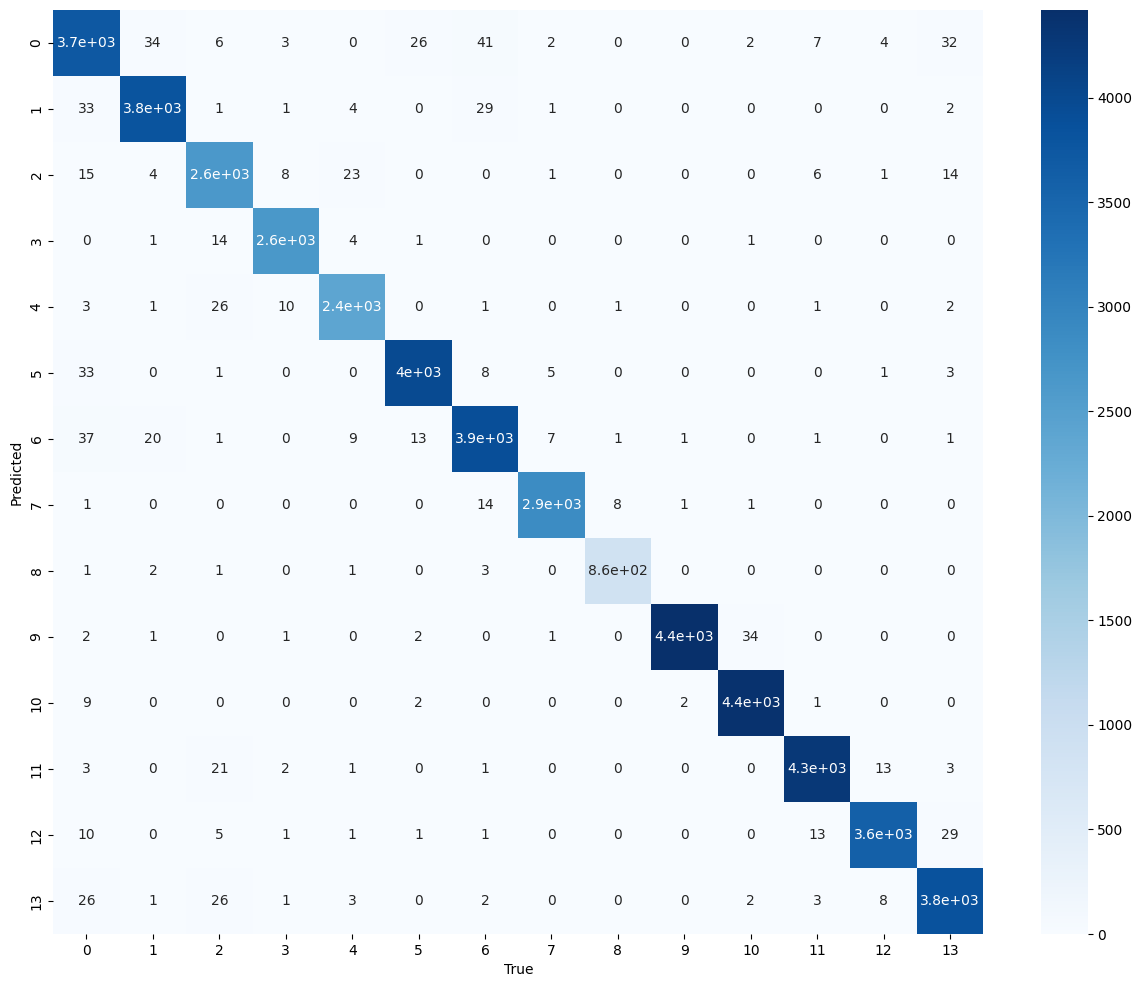

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# assume you already have a DataFrame named RNN_errors
# with columns "label", "correct_pred", and "pred"

# generate the confusion matrix
cm = confusion_matrix(RNN_errors["label"], RNN_errors["pred"], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

# plot the confusion matrix as a heatmap using seaborn
plt.figure(figsize=(15,12))
sns.heatmap(cm, cmap="Blues", annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

# show the plot
plt.show()


## Base Line Model 

In [137]:
notebook_path = os.path.abspath('__file__')
root_dir = os.path.dirname(notebook_path)
file_path = os.path.join(root_dir, 'CSVs', 'prediction_df_LR.csv')
BL_errors = pd.read_csv(file_path)

C:\Users\no_mi\AppData\Local\Temp\ipykernel_41956\3202181225.py:4: DtypeWarning: Columns (2,3,19) have mixed types. Specify dtype option on import or set low_memory=False.
  BL_errors = pd.read_csv(file_path)


In [138]:
(BL_errors.dtypes)

Unnamed: 0      float64
label           float64
title            object
content          object
Prob. 0         float64
Prob. 1         float64
Prob. 2         float64
Prob. 3         float64
Prob. 4         float64
Prob. 5         float64
Prob. 6         float64
Prob. 7         float64
Prob. 8         float64
Prob. 9         float64
Prob. 10        float64
Prob. 11        float64
Prob. 12        float64
Prob. 13        float64
Predict         float64
correct_pred     object
Unnamed: 20     float64
Unnamed: 21     float64
dtype: object

In [139]:
import pandas as pd

# assume you already have a DataFrame named RNN_errors
# with columns "label", "correct_pred", and "pred"

# define a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(BL_errors[BL_errors["correct_pred"] == False], index="label", columns="Predict", values="correct_pred", aggfunc="count")

# rename the columns and index labels
false_counts.rename(columns={"count": "Count of false predictions"}, index=label_lookup, inplace=True)
false_counts.index.name = "True Category"

# sort the table by the highest count of False values
false_counts_sorted = false_counts.sum(axis=1).sort_values(ascending=False)

# print the sorted table
(false_counts_sorted)


True Category
Company                   207.0
Building                  137.0
WrittenWork               110.0
Artist                    106.0
EducationalInstitution     88.0
Film                       75.0
OfficeHolder               53.0
Album                      50.0
Plant                      37.0
MeanOfTransportation       35.0
Animal                     35.0
NaturalPlace               27.0
Athlete                    21.0
Village                    15.0
dtype: float64

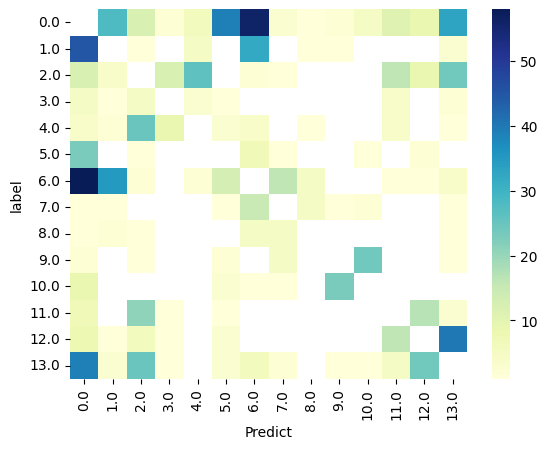

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assume you already have a DataFrame named RNN_errors
# with columns "label", "correct_pred", and "pred"

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(BL_errors[BL_errors["correct_pred"] == False], index="label", columns="Predict", values="correct_pred", aggfunc="count")

# create a heatmap of the false_counts table using seaborn
sns.heatmap(false_counts, cmap="YlGnBu")

# show the plot
plt.show()

In [141]:
# assume you already have a DataFrame named BL_errors
# with columns "label", "correct_pred", "Pred", "Prob. 0", "Prob. 1", ..., "Prob. 13"

# output the BL_errors DataFrame to a CSV file
BL_errors.to_csv("BL_errors.csv", index=False)


## This chart shows "when there was a false prediction, how close was the model to predicting the correct answer"

In [154]:
# assume you already have a DataFrame named BL_errors
# with columns "label", "correct_pred", "Pred", "Prob. 0", "Prob. 1", ..., "Prob. 13"

# create a new column called "conf_wrong"
BL_errors["conf_wrong"] = 0

# loop over the rows in the DataFrame
for i, row in BL_errors.iterrows():
    try:
        # if correct_pred is False, set conf_wrong to the appropriate Prob. column value
        if not row["correct_pred"]:
            col_name = "Prob. " + str(int(row["label"]))
            col_idx = BL_errors.columns.get_loc(col_name)
            BL_errors.at[i, "conf_wrong"] = row.iloc[col_idx]
        # if correct_pred is True, conf_wrong remains 0
    except KeyError:
        # if there is a KeyError (e.g. column name doesn't exist), set conf_wrong to 0 and print row number
        BL_errors.at[i, "conf_wrong"] = 0
        print("Error at row", i)

# print the updated DataFrame
print(BL_errors)


        Unnamed: 0  label                              title  \
0              0.0    0.0                   E. D. Abbott Ltd   
1              1.0    0.0                     Schwan-Stabilo   
2              2.0    0.0  Marvell Software Solutions Israel   
3              3.0    0.0        Bergan Mercy Medical Center   
4              4.0    0.0                 The Unsigned Guide   
...            ...    ...                                ...   
384686         NaN    NaN                                NaN   
384687         NaN    NaN                                NaN   
384688         NaN    NaN                                NaN   
384689         NaN    NaN                                NaN   
384690         NaN    NaN                                NaN   

                                                  content   Prob. 0  \
0        Abbott of Farnham E D Abbott Limited was a Br...  0.910951   
1        Schwan-STABILO is a German maker of pens for ...  1.000000   
2        Marvell S

C:\Users\no_mi\AppData\Local\Temp\ipykernel_41956\3816522020.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(BL_errors)


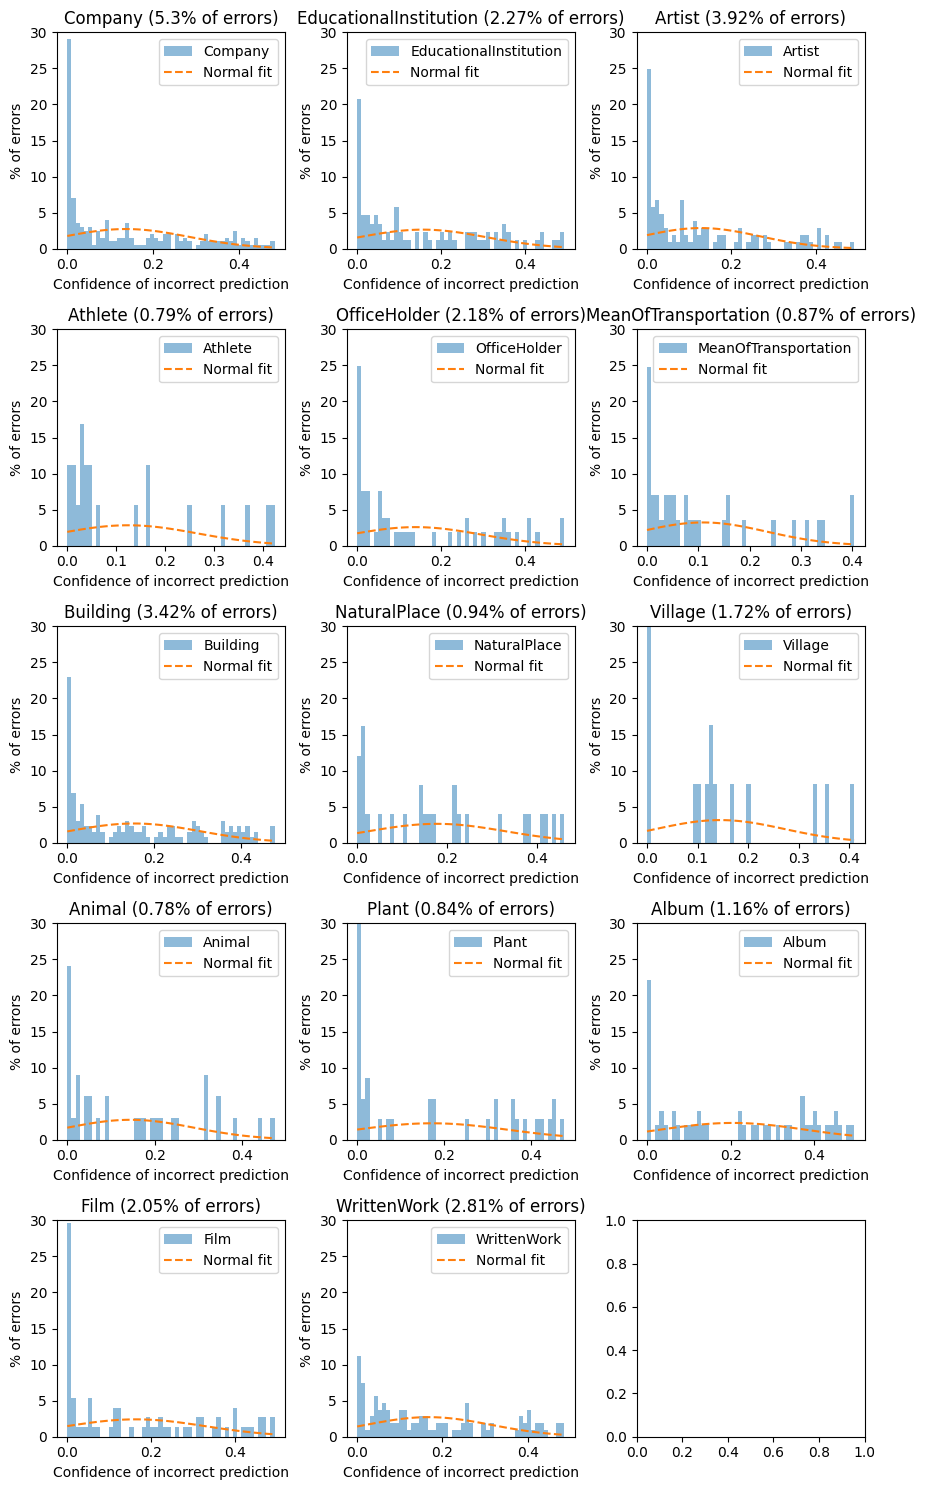

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# assume you already have a DataFrame named BL_errors
# with columns "label", "correct_pred", "Pred", "Prob. 0", "Prob. 1", ..., "Prob. 13", and "conf_wrong"

# create a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# set the y-axis limit to 30%
y_limit = 30
x_limit = 0.5

# loop over the labels and plot a histogram for each
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(9, 15), tight_layout=True)
for i, (label_value, label_name) in enumerate(label_lookup.items()):
    # select the rows with the current label value and exclude conf_wrong values of 0
    conf_wrong_values = BL_errors[(BL_errors["label"] == label_value) & (BL_errors["conf_wrong"] != 0)]["conf_wrong"]
    
    # calculate proportion of errors
    prop_errors = (len(conf_wrong_values) / len(BL_errors[BL_errors["label"] == label_value])) * 100

    # plot the histogram using numpy and matplotlib
    ax = axs[i//3, i%3]  # select the appropriate subplot
    n, bins, patches = ax.hist(conf_wrong_values, bins=50, density=True, alpha=0.5, label=label_name)
    y = ((1 / (np.sqrt(2 * np.pi) * np.std(conf_wrong_values))) *
         np.exp(-0.5 * (1 / np.std(conf_wrong_values) * (bins - np.mean(conf_wrong_values))) ** 2))
    ax.plot(bins, y, '--', label='Normal fit')
    ax.set_xlabel('Confidence of incorrect prediction')
    ax.set_ylabel('% of errors')
    ax.set_title( label_name + ' ({}% of errors)'.format(round(prop_errors, 2)))
    ax.set_ylim([0, y_limit])
    ax.legend()

# show the plot
plt.show()


## Comparison between RNN and BaseLine

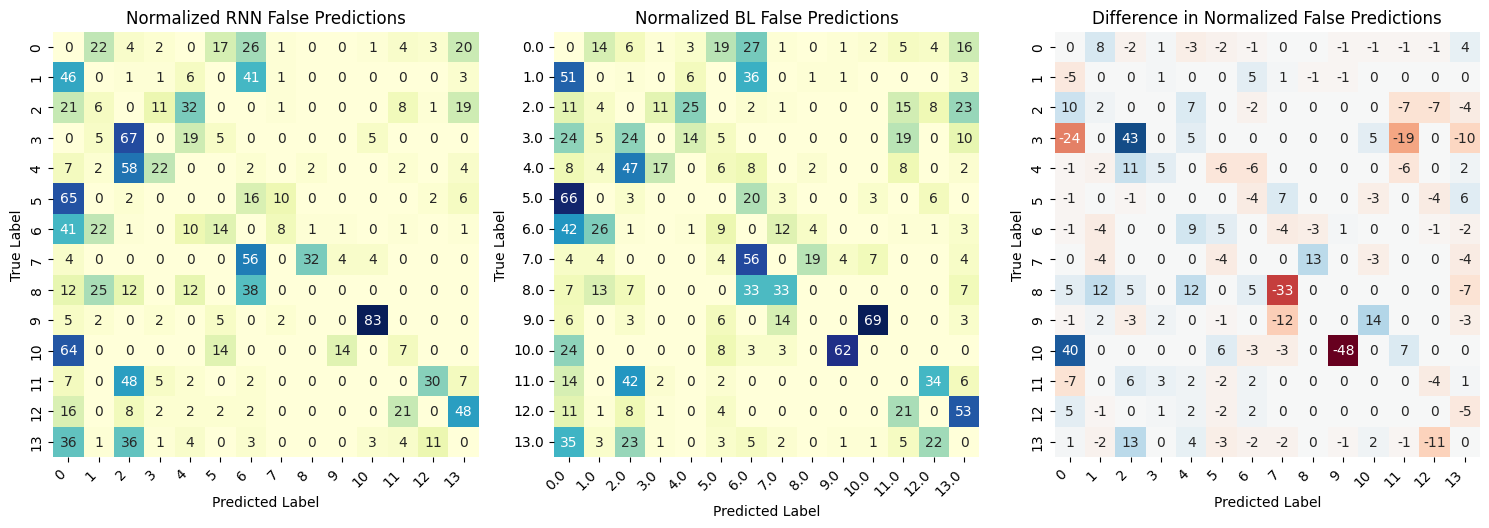

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# assume you already have a DataFrame named RNN_errors and BL_errors
# with columns "label", "correct_pred", and "pred"

# create pivot tables to count False values by label and pred for each dataframe
false_counts_rnn = pd.pivot_table(RNN_errors[RNN_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count", fill_value=0)
false_counts_bl = pd.pivot_table(BL_errors[BL_errors["correct_pred"] == False], index="label", columns="Predict", values="correct_pred", aggfunc="count", fill_value=0)

# normalize pivot tables to show % of wrong predictions for each label
false_counts_norm_rnn = false_counts_rnn.div(false_counts_rnn.sum(axis=1), axis=0) * 100
false_counts_norm_bl = false_counts_bl.div(false_counts_bl.sum(axis=1), axis=0) * 100

# round normalized pivot tables to integer percentage values
false_counts_norm_rounded_rnn = false_counts_norm_rnn.round().astype(int)
false_counts_norm_rounded_bl = false_counts_norm_bl.round().astype(int)

# calculate difference between the two normalized pivot tables
diff_counts = false_counts_norm_rounded_rnn - false_counts_norm_rounded_bl

# create subplots and plot heatmaps for each normalized and difference pivot table
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.heatmap(false_counts_norm_rounded_rnn, cmap="YlGnBu", annot=True, fmt="d", cbar=False, ax=axs[0])
axs[0].set_title("Normalized RNN False Predictions")
axs[0].set_xlabel("Predicted Label")
axs[0].set_ylabel("True Label")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.heatmap(false_counts_norm_rounded_bl, cmap="YlGnBu", annot=True, fmt="d", cbar=False, ax=axs[1])
axs[1].set_title("Normalized BL False Predictions")
axs[1].set_xlabel("Predicted Label")
axs[1].set_ylabel("True Label")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.heatmap(diff_counts, cmap="RdBu", center=0, annot=True, fmt="d", cbar=False, ax=axs[2])
axs[2].set_title("Difference in Normalized False Predictions")
axs[2].set_xlabel("Predicted Label")
axs[2].set_ylabel("True Label")
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, horizontalalignment='right')

# normalize cell sizes for all plots
for ax in axs:
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


## Could these charts be good? 

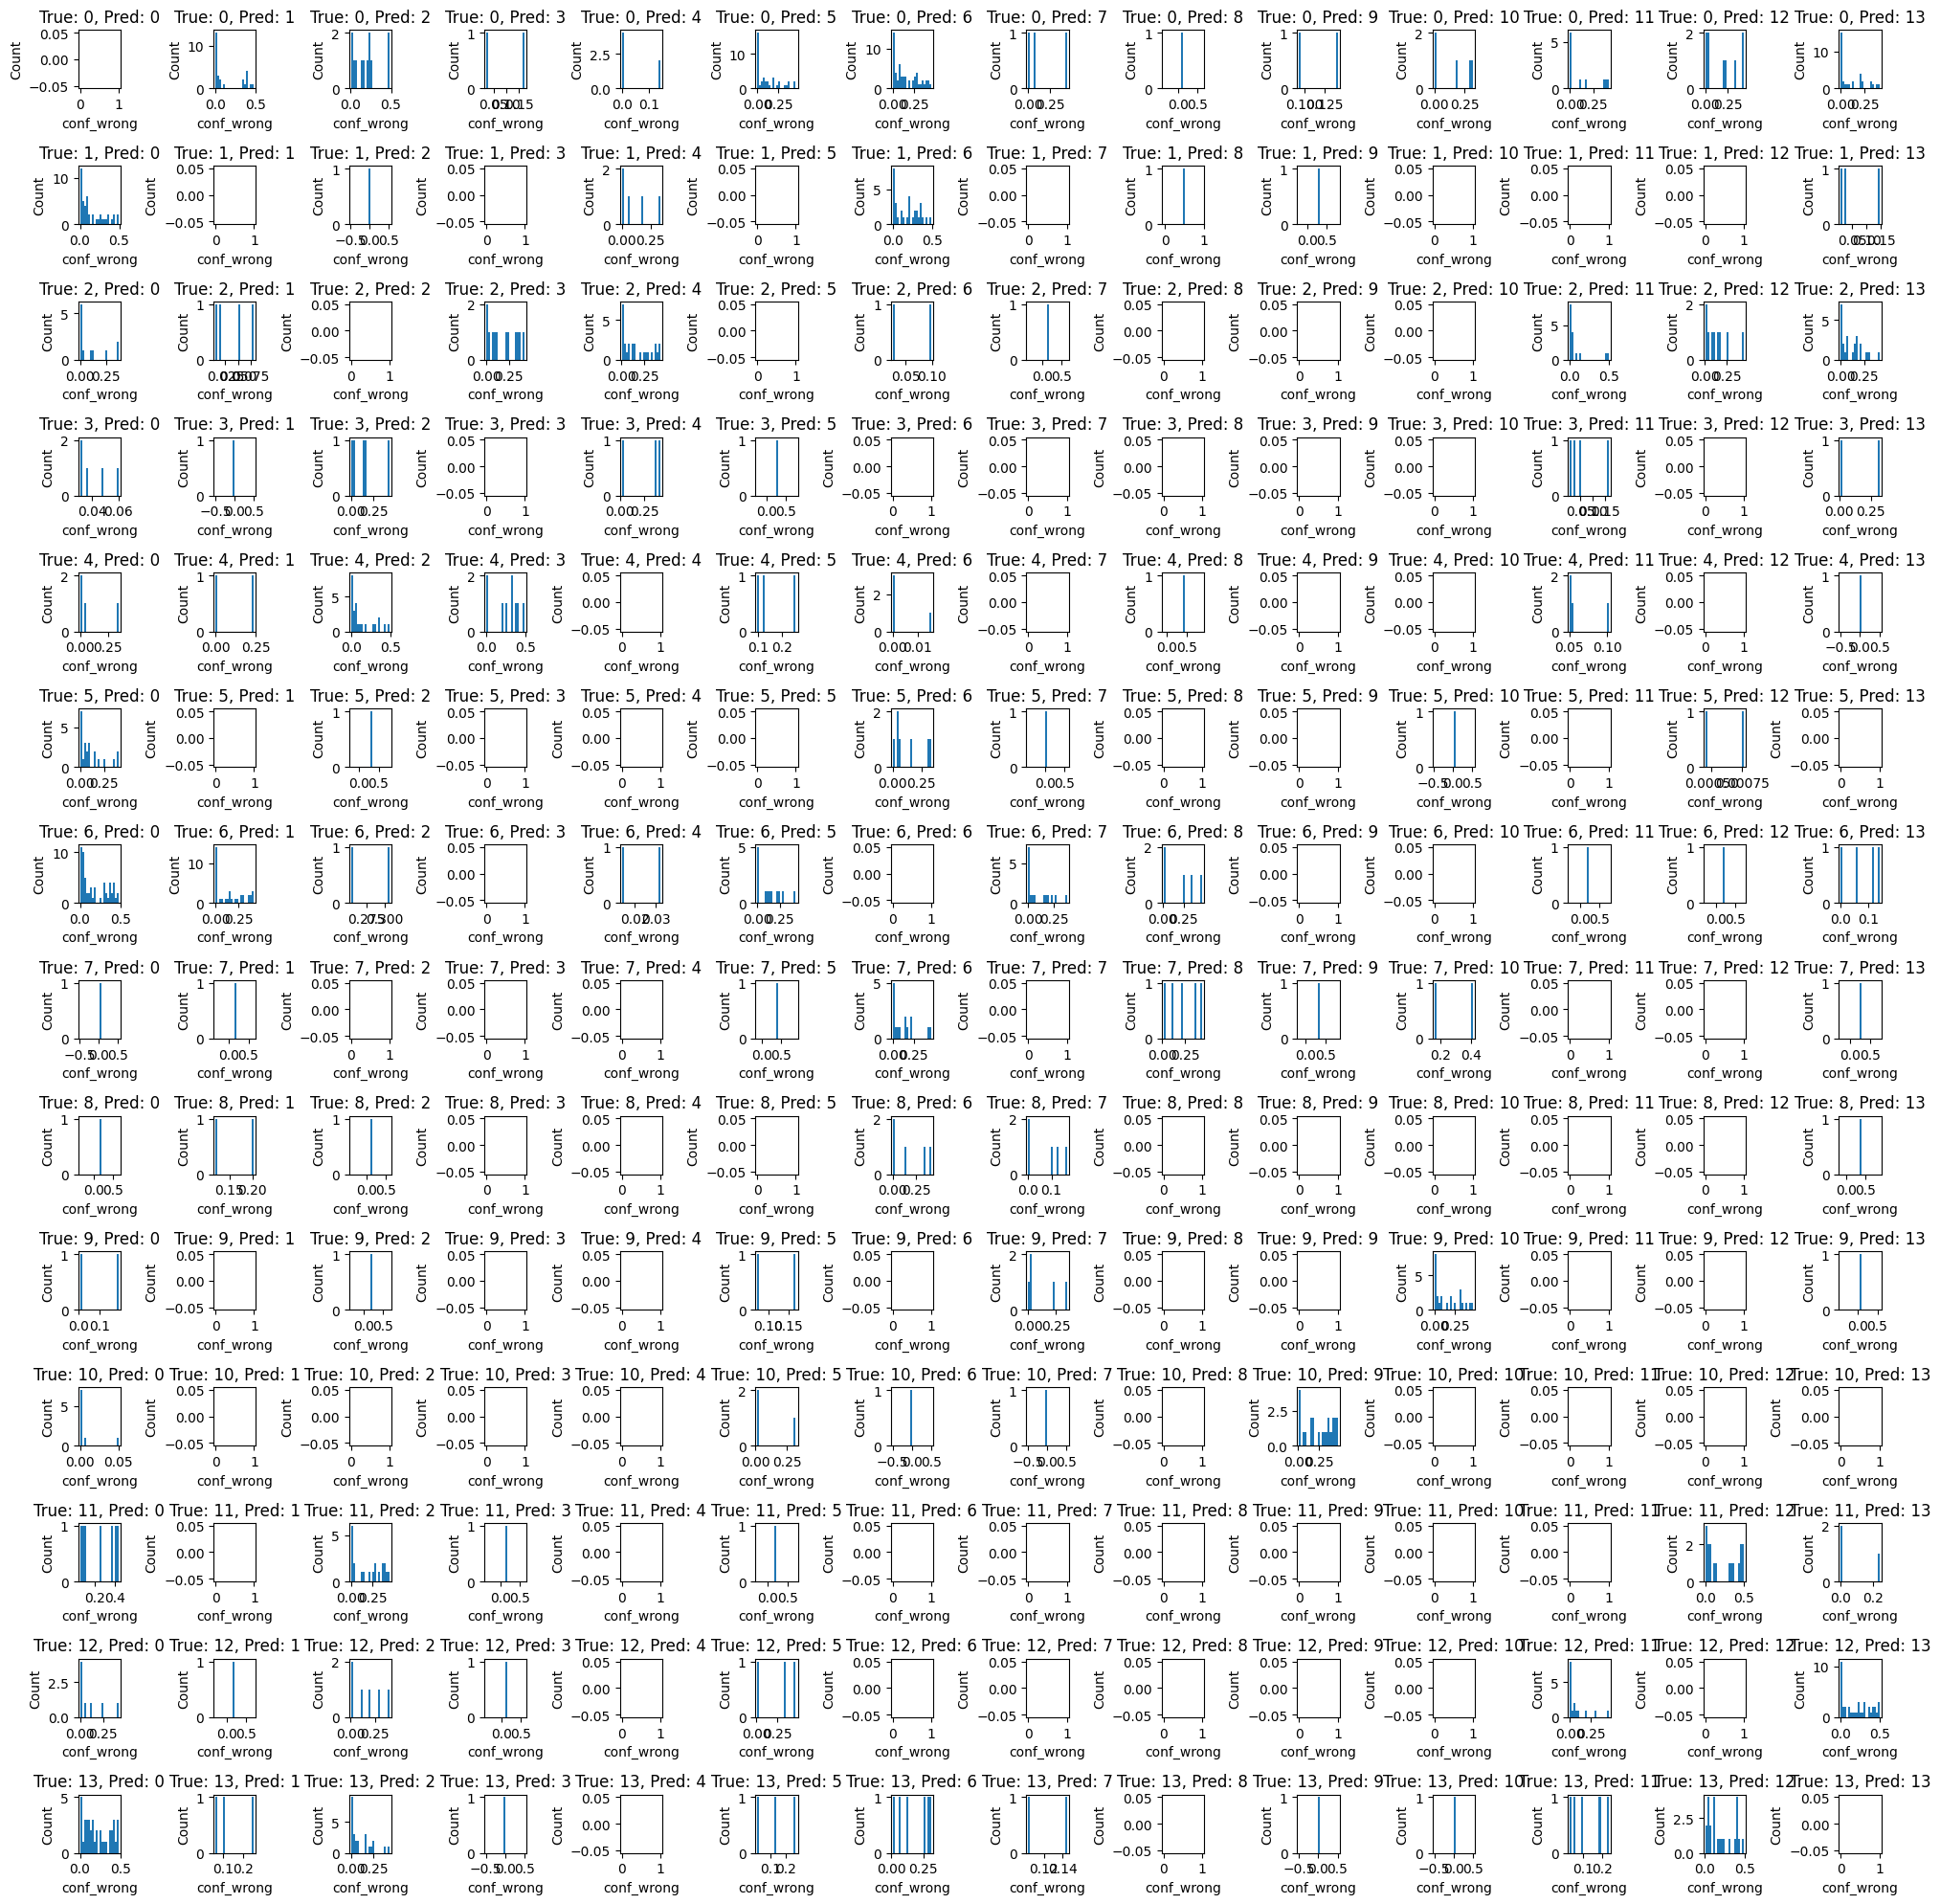

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# assume you already have a DataFrame named BL_errors
# with columns "label", "correct_pred", "Pred", "Prob. 0", "Prob. 1", ..., "Prob. 13", "conf_wrong"

# create a 14x14 grid of subplots
fig, axs = plt.subplots(14, 14, figsize=(20, 20))

# loop over the combinations of label and Pred values
for i in range(14):
    for j in range(14):
        # select the rows where label and Pred match the current combination
        label_val = i
        pred_val = j
        subset = BL_errors[(BL_errors["label"] == label_val) & (BL_errors["Predict"] == pred_val)]
        # plot a histogram of non-zero conf_wrong values for the current combination
        axs[i, j].hist(subset[subset["conf_wrong"] != 0]["conf_wrong"], bins=20)
        axs[i, j].set_title("True: {}, Pred: {}".format(label_val, pred_val))
        axs[i, j].set_xlabel("conf_wrong")
        axs[i, j].set_ylabel("Count")

# adjust the layout of the subplots
fig.tight_layout()

# show the plot
plt.show()


## BERT Model 

In [145]:
notebook_path = os.path.abspath('__file__')
root_dir = os.path.dirname(notebook_path)
file_path = os.path.join(root_dir, 'CSVs', 'test_errors_BERT.csv')
BERT_errors = pd.read_csv(file_path)

In [146]:
(BERT_errors.dtypes)

Unnamed: 0       int64
label            int64
title           object
content         object
words_count      int64
pred             int64
correct_pred      bool
dtype: object

In [157]:
import pandas as pd

# assume you already have a DataFrame named RNN_errors
# with columns "label", "correct_pred", and "pred"

# define a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(BERT_errors[BERT_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count")

# rename the columns and index labels
false_counts.rename(columns={"count": "Count of false predictions"}, index=label_lookup, inplace=True)
false_counts.index.name = "True Category"

# sort the table by the highest count of False values
false_counts_sorted = false_counts.sum(axis=1).sort_values(ascending=False)

# print the sorted table
(false_counts_sorted)


True Category
Company                   100.0
Building                   74.0
EducationalInstitution     56.0
Artist                     47.0
OfficeHolder               35.0
Film                       35.0
WrittenWork                30.0
Plant                      21.0
Album                      21.0
MeanOfTransportation       18.0
NaturalPlace               14.0
Athlete                     9.0
Animal                      6.0
Village                     5.0
dtype: float64

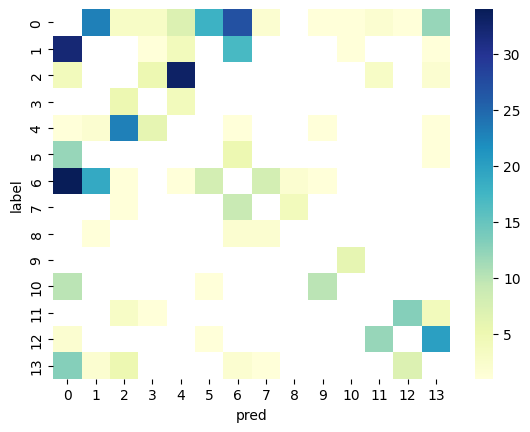

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assume you already have a DataFrame named RNN_errors
# with columns "label", "correct_pred", and "pred"

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(BERT_errors[BERT_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count")

# create a heatmap of the false_counts table using seaborn
sns.heatmap(false_counts, cmap="YlGnBu")

# show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

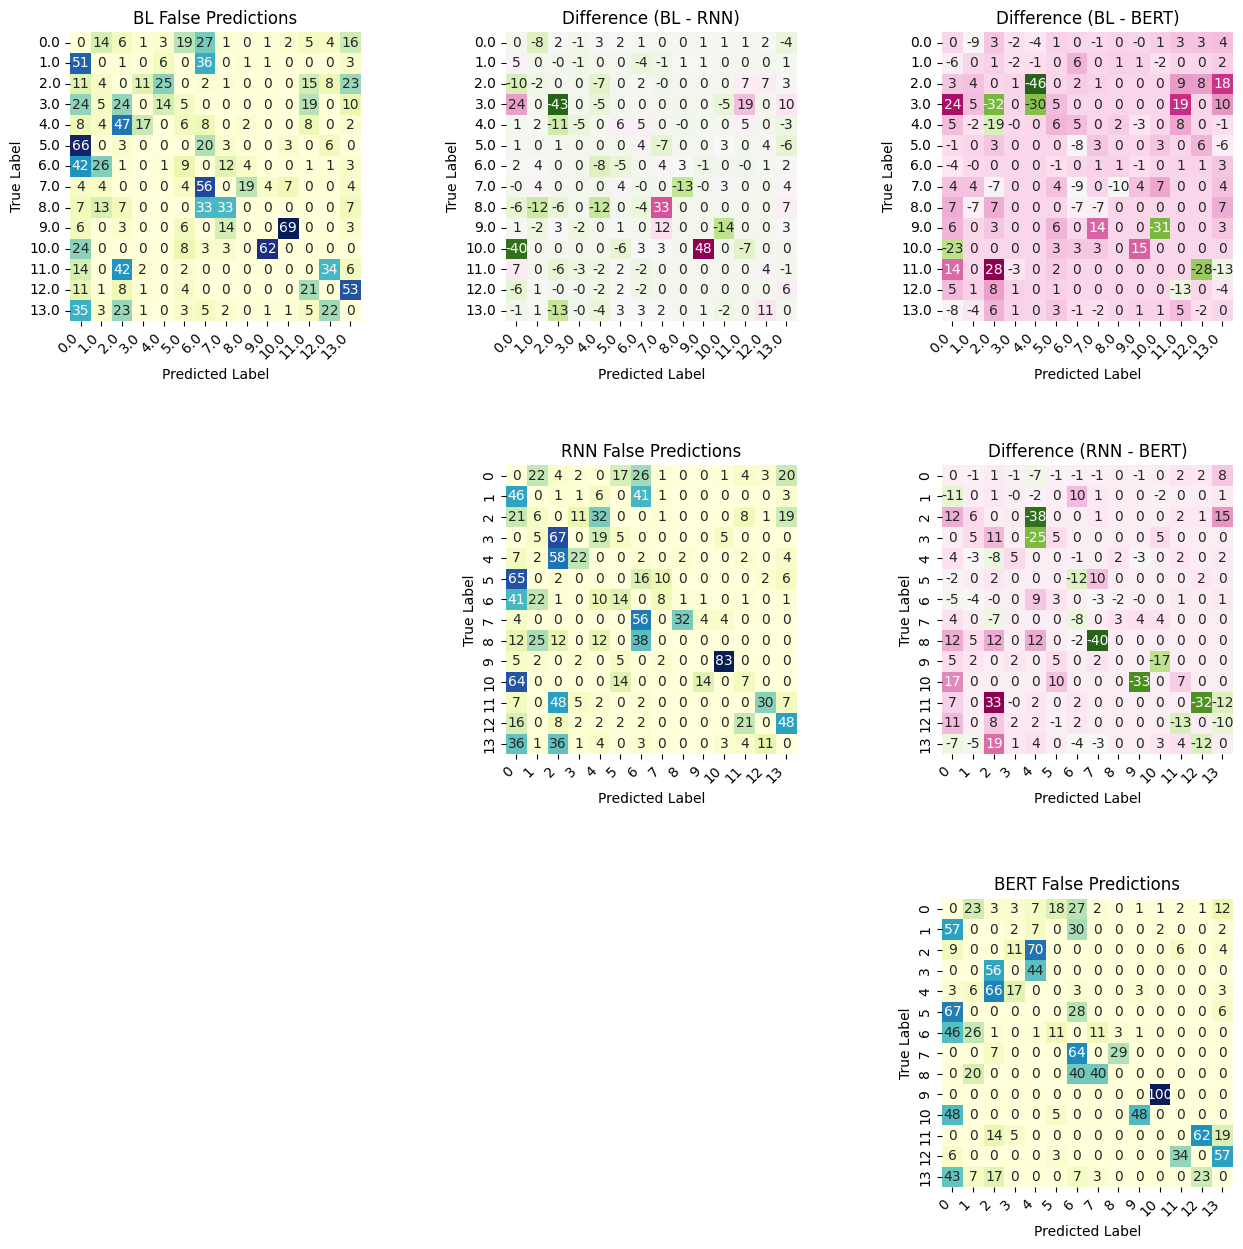

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# assume you already have DataFrames named BL_errors, RNN_errors, and BERT_errors
# with columns "label", "correct_pred", and "pred"

# create pivot tables to count False values by label and pred for each model
false_counts_bl = pd.pivot_table(BL_errors[BL_errors["correct_pred"] == False], index="label", columns="Predict", values="correct_pred", aggfunc="count", fill_value=0)
false_counts_rnn = pd.pivot_table(RNN_errors[RNN_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count", fill_value=0)
false_counts_bert = pd.pivot_table(BERT_errors[BERT_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count", fill_value=0)

# normalize pivot tables to show % of wrong predictions for each label
false_counts_norm_bl = false_counts_bl.div(false_counts_bl.sum(axis=1), axis=0) * 100
false_counts_norm_rnn = false_counts_rnn.div(false_counts_rnn.sum(axis=1), axis=0) * 100
false_counts_norm_bert = false_counts_bert.div(false_counts_bert.sum(axis=1), axis=0) * 100

# calculate percentage difference between pairs of models
diff_counts_br = (false_counts_norm_bl - false_counts_norm_rnn).round(2)
diff_counts_rb = 0*(false_counts_norm_rnn - false_counts_norm_bl).round(2)
diff_counts_bb = (false_counts_norm_bl - false_counts_norm_bert).round(2)
diff_counts_bertb = 0*(false_counts_norm_bert - false_counts_norm_bl).round(2)
diff_counts_rr = (false_counts_norm_rnn - false_counts_norm_bert).round(2)
diff_counts_bertr = 0*(false_counts_norm_bert - false_counts_norm_rnn).round(2)

# create subplots and plot heatmaps for each difference pivot table
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

sns.heatmap(false_counts_norm_bl, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=axs[0,0])
axs[0,0].set_title("BL False Predictions")
axs[0,0].set_xlabel("Predicted Label")
axs[0,0].set_ylabel("True Label")
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.heatmap(false_counts_norm_rnn, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=axs[1,1])
axs[1,1].set_title("RNN False Predictions")
axs[1,1].set_xlabel("Predicted Label")
axs[1,1].set_ylabel("True Label")
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.heatmap(false_counts_norm_bert, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=axs[2,2])
axs[2,2].set_title("BERT False Predictions")
axs[2,2].set_xlabel("Predicted Label")
axs[2,2].set_ylabel("True Label")
axs[2,2].set_xticklabels(axs[2,2].get_xticklabels(), rotation=45, horizontalalignment='right')

# create heatmap for difference between BL and RNN
sns.heatmap(diff_counts_br, cmap="PiYG_r", annot=True, fmt=".0f", cbar=False, ax=axs[0,1])
axs[0,1].set_title("Difference (BL - RNN)")
axs[0,1].set_xlabel("Predicted Label")
axs[0,1].set_ylabel("True Label")
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=45, horizontalalignment='right')

axs[1,0].axis('off')

# create heatmap for difference between BL and BERT
sns.heatmap(diff_counts_bb, cmap="PiYG_r", annot=True, fmt=".0f", cbar=False, ax=axs[0,2])
axs[0,2].set_title("Difference (BL - BERT)")
axs[0,2].set_xlabel("Predicted Label")
axs[0,2].set_ylabel("True Label")
axs[0,2].set_xticklabels(axs[0,2].get_xticklabels(), rotation=45, horizontalalignment='right')

axs[2,0].axis('off')

# create heatmap for difference between RNN and BERT
sns.heatmap(diff_counts_rr, cmap="PiYG_r", annot=True, fmt=".0f", cbar=False, ax=axs[1,2])
axs[1,2].set_title("Difference (RNN - BERT)")
axs[1,2].set_xlabel("Predicted Label")
axs[1,2].set_ylabel("True Label")
axs[1,2].set_xticklabels(axs[1,2].get_xticklabels(), rotation=45, horizontalalignment='right')

axs[2,1].axis('off')

# adjust layout and show plot
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show

